In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix


### Attributes

* buying
* maint
* doors
* persons
* lug_boot
* safety

## Loading the data

In [3]:
car_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names'

In [4]:
df = pd.read_csv(car_data, header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

In [6]:
df = pd.read_csv(car_data, index_col= False, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Plot the data

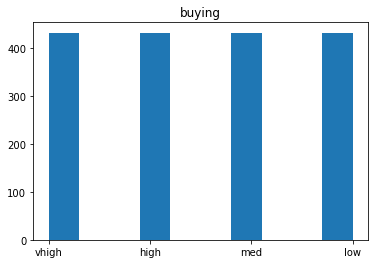

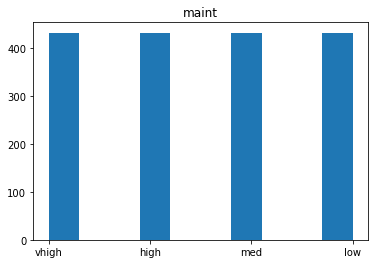

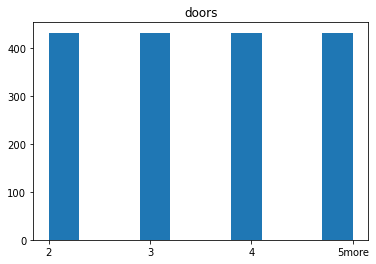

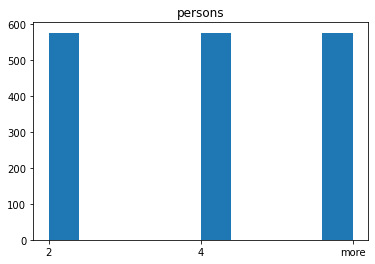

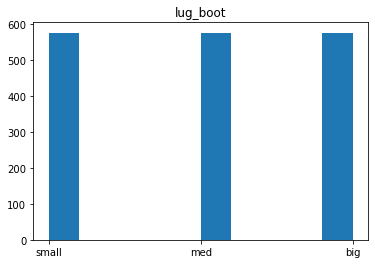

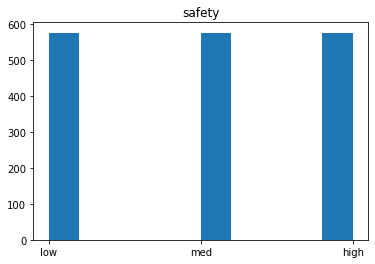

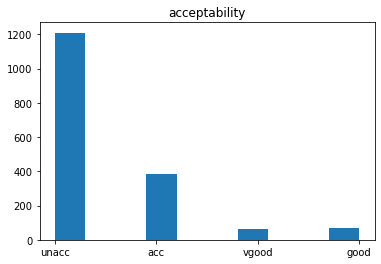

In [7]:
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

## Cleaning the data

In [25]:
df.columns = columns
df.head(4)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc


In [26]:
df = df.replace({'5more': 5, 'more': 5})
df = df.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df = df.replace({'big': 3, 'small': 1})
df = df.replace({'acc': 1, 'unacc': 0, 'good': 2, 'vgood': 3})
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2


## Training and test the data

In [27]:
X, y = df.iloc[:,:-1], df.acceptability

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
# buying = ['low', 'med', 'high', 'vhigh']
# maint = ['low', 'med', 'high', 'vhigh']
# doors = ['2', '3', '4', '5more']
# persons = ['2', '4', 'more']
# lug_b = ['small', 'med', 'big']
# safety = ['low', 'med', 'high']
# oe = OrdinalEncoder(categories=[buying, maint, doors, persons, lug_b, safety])
# oe

In [24]:
# X_train_encoded = oe.fit_transform(X_train)
# X_test_encoded = oe.transform(X_test)

## Decision tree

In [30]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

In [31]:

dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.5960365853658537, 0.9615384615384616, 'safety <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.5838414634146342, 0.8846153846153846, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.6082317073170732, 0.8846153846153846, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.5960365853658537, 0.8076923076923077, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.6204268292682927, 0.8076923076923077, 'buying <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.3201219512195122, 0.7307692307692307, 'maint <= 1.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.11280487804878049, 0.6538461538461539, 'safety <= 2.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = good'),
 Text(0.06097560975609756, 0.5769230769230769, 'lug_boot <= 1.5\ngini = 0.456\nsamples = 31\nvalue 

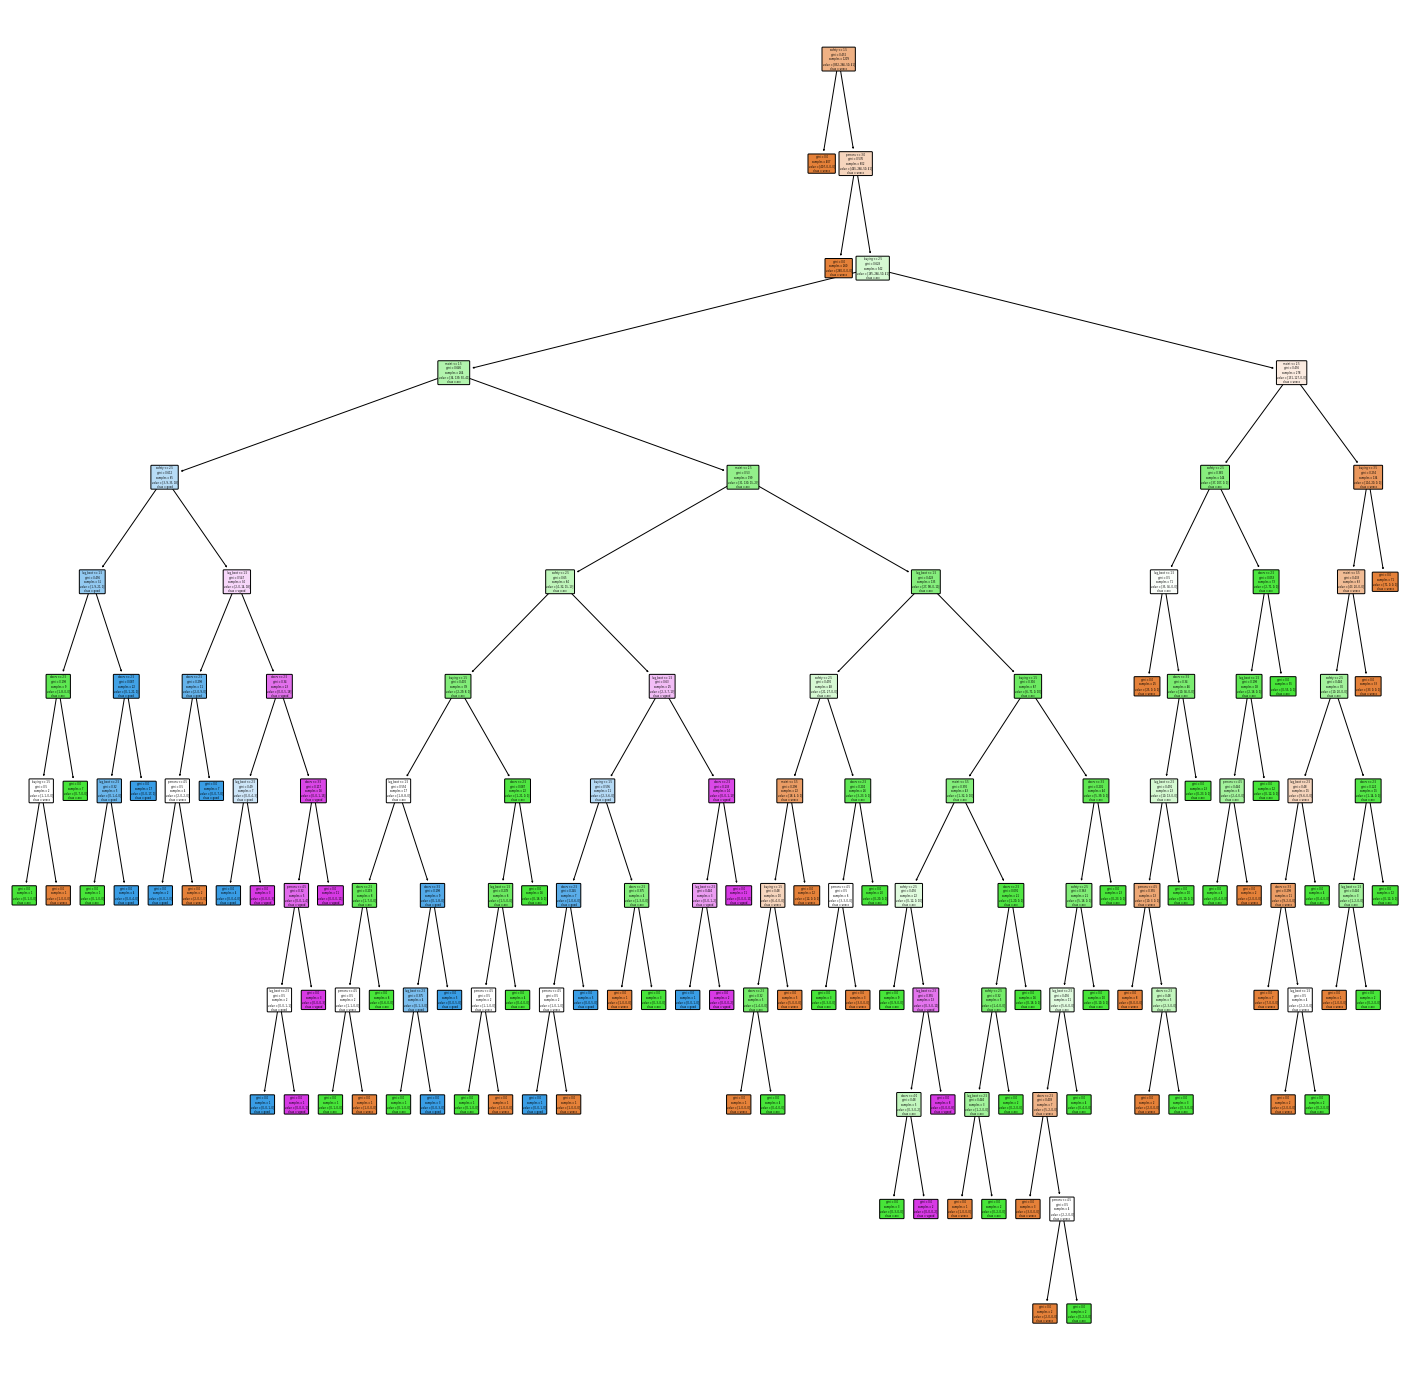

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 25))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
          feature_names=X.columns)

## Checking Decision Tree with different Parameters


In [35]:
# In this case I set a max depth as 4
dt_clf_2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf_fit_2 = dt_clf_2.fit(X_train, y_train)
dt_clf_fit_2

DecisionTreeClassifier(max_depth=4, random_state=42)

[Text(0.25, 0.9, 'safety <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.375, 0.7, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.5, 0.5, 'buying <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.25, 0.3, 'maint <= 1.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.125, 0.1, 'gini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = good'),
 Text(0.375, 0.1, 'gini = 0.53\nsamples = 199\nvalue = [31, 130, 15, 23]\nclass = acc'),
 Text(0.75, 0.3, 'maint <= 2.5\ngini = 0.496\nsamples = 278\nvalue = [151, 127, 0, 0]\nclass = unacc'),
 Text(0.625, 0.1, 'gini = 0.382\nsamples = 144\nvalue = [37, 107, 0, 0]\nclass = acc'),
 Text(0.875, 0.1, 'gini = 0.254\nsa

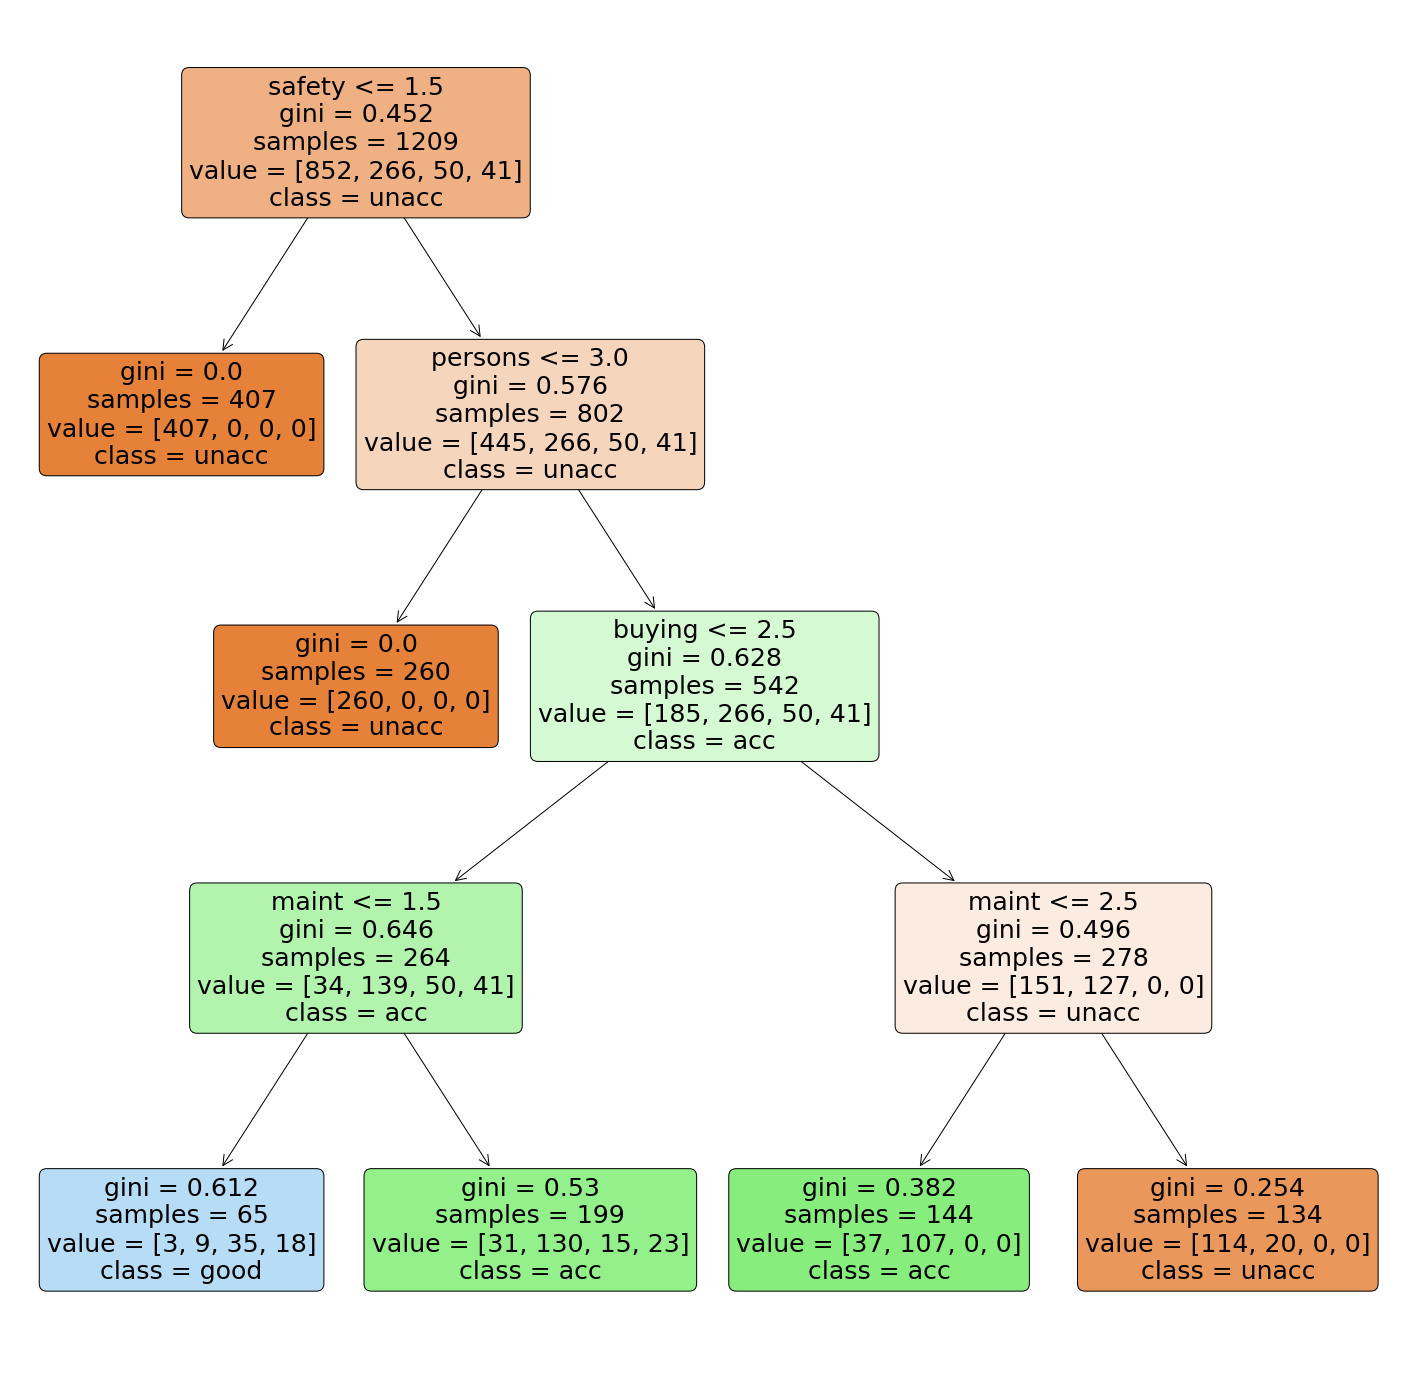

In [39]:
plt.figure(figsize=(25, 25))
plot_tree(dt_clf_2,
          filled=True,
          rounded=True,
          impurity=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
          feature_names=X.columns)

## Plot confusion matrix

C:\Users\andre\anaconda3\envs\Strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


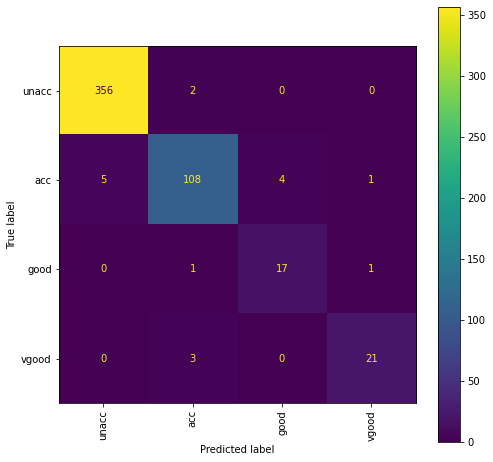

In [33]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(dt_clf, X_test, y_test, xticks_rotation=90, display_labels=['unacc', 'acc', 'good', 'vgood'], ax = ax)

## Prediction

In [40]:
y_pred = dt_clf.predict(X_test)

In [41]:
# check the accuracy

(y_pred == y_test).sum() / len(y_test)

0.9672447013487476

In [43]:
# check the cross validate method

cv = cross_validate(dt_clf, X_train, y_train, cv=5)
cv

{'fit_time': array([0.00599837, 0.00699949, 0.00700259, 0.00699258, 0.00700164]),
 'score_time': array([0.00400066, 0.00300646, 0.00400233, 0.00300503, 0.00299692]),
 'test_score': array([0.97107438, 0.96280992, 0.97520661, 0.97520661, 0.9626556 ])}

## Random Forest

In [53]:
forest = RandomForestClassifier(n_estimators=4)
forest = forest.fit(X_train, y_train)
forest

RandomForestClassifier(n_estimators=4)

In [54]:
forest_predict = forest.predict(X_test)
forest_predict

array([0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 1,
       3, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 2, 3, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0,

In [55]:
(forest_predict == y_test).sum() / len(y_test)

0.9248554913294798

In [56]:
# I tried with a different n. of estimators

forest_new = RandomForestClassifier(n_estimators=2)
forest_new = forest_new.fit(X_train, y_train)
forest_new

RandomForestClassifier(n_estimators=2)

In [57]:
forest_predict_new = forest_new.predict(X_test)
forest_predict_new

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [58]:
(forest_predict_new == y_test).sum() / len(y_test)

0.8670520231213873

## GridSearchCV


In [71]:
params = {'criterion': ['gini', 'entropy']}
grd = GridSearchCV(estimator = dt_clf, param_grid = params, scoring='accuracy')
grid_train = grd.fit(X_train,y_train) 
grid_train


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [67]:
dt_clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [72]:
best_param = grd.best_params_
best_param

{'criterion': 'entropy'}

In [73]:
accuracy = grd.best_score_
accuracy

0.9751791776688042

## LDA



In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [101]:
lda_fit = lda.fit_transform(X_train, y_train)

In [102]:
lda_fit

array([[ 2.36784038,  0.04138897, -1.18701676],
       [-1.10777074,  0.56491087,  1.63778618],
       [ 1.03615813, -1.14328428,  0.16225973],
       ...,
       [ 2.60284742,  0.52114925,  0.54815465],
       [-0.93413985, -0.88607842, -0.0646304 ],
       [ 0.88269635, -0.1464677 ,  1.5622867 ]])

In [103]:
forest_def = RandomForestClassifier(n_estimators=100)
forest_def = forest_def.fit(X_train, y_train)
forest_def

RandomForestClassifier()

In [104]:
X_train_lda = lda.transform(X_train)

In [99]:
X_train_lda

array([[ 2.36784038,  0.04138897],
       [-1.10777074,  0.56491087],
       [ 1.03615813, -1.14328428],
       ...,
       [ 2.60284742,  0.52114925],
       [-0.93413985, -0.88607842],
       [ 0.88269635, -0.1464677 ]])

In [105]:
X_test_lda = lda.transform(X_test)

In [106]:
prediction = forest_def.predict(X_test_lda)

C:\Users\andre\anaconda3\envs\Strive\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but RandomForestClassifier is expecting 6 features as input.